In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('hmelq_clean.csv')

In [3]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,29.311,64.074,16.199,HomeImp,Other,28.000,0.000,0.000,18.711,0.000,14.000,13.321
1,0,19.771,112.857,16.569,DebtCon,Other,2.000,0.000,0.000,18.002,0.000,25.000,13.443
2,0,21.390,86.871,14.924,DebtCon,Other,5.000,0.000,0.000,15.992,2.000,9.000,11.077


## Scale


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
dfCopy = df.copy()
x_ = dfCopy[['bad','job','reason']]

#StandardScaler
scale_col = pd.DataFrame(StandardScaler().fit_transform(dfCopy[['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']]),
            columns=['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'])
dfScale = pd.concat([x_, scale_col], axis=1)

#MinMaxScaler
minmax_col = pd.DataFrame(MinMaxScaler().fit_transform(dfCopy[['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']]),
            columns=['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'])
dfMinMax = pd.concat([x_, minmax_col], axis=1)

## Dummy

In [6]:
dms = pd.get_dummies(dfCopy[['reason','job']])

#Normal
Xn_ = dfCopy.drop(['reason','job'], axis=1)
dfCopy_dummy = pd.concat([Xn_,dms], axis=1)
dfCopy_dummy = dfCopy_dummy.drop(['reason_DebtCon'], axis=1)

#StandardScaler
Xs_ = dfScale.drop(['reason','job'], axis=1)
dfScale_dummy = pd.concat([Xs_,dms], axis=1)
dfScale_dummy = dfScale_dummy.drop(['reason_DebtCon'], axis=1)

#MinMaxScaler
Xm_ = dfMinMax.drop(['reason','job'], axis=1)
dfMinMax_dummy = pd.concat([Xm_,dms], axis=1)
dfMinMax_dummy = dfMinMax_dummy.drop(['reason_DebtCon'], axis=1)

In [7]:
dfCopy_dummy.head(3)

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,29.311,64.074,16.199,28.000,0.000,0.000,18.711,0.000,14.000,13.321,1,0,0,1,0,0,0
1,0,19.771,112.857,16.569,2.000,0.000,0.000,18.002,0.000,25.000,13.443,0,0,0,1,0,0,0
2,0,21.390,86.871,14.924,5.000,0.000,0.000,15.992,2.000,9.000,11.077,0,0,0,1,0,0,0


## Model

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)

model = LogisticRegression()

In [10]:
aio.confusion(X, y, model)

Accuracy: 0.85335 | AUC: 0.78166


,pred_0,pred_1,precision,recall,f1-score,support
0,567,24,0.875,0.959,0.915,591.000
1,81,44,0.647,0.352,0.456,125.000


In [11]:
dfModel = pd.DataFrame(columns = ['cross-val', 'train_score', 'test_score', 'precision', 'recall', 'f1-score', 'auc-roc', 'auc-pr'])

In [12]:
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'log'))

In [13]:
y_scale = dfScale_dummy.bad
X_scale = dfScale_dummy.drop(['bad'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X_scale, y_scale, model, 'log_scale'))

In [14]:
y_minmax = dfMinMax_dummy.bad
X_minmax = dfMinMax_dummy.drop(['bad'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X_minmax, y_minmax, model, 'log_minmax'))

In [15]:
y_clno = dfCopy_dummy.bad
X_clno = dfCopy_dummy.drop(['bad','clno'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X_clno, y_clno, model, 'log_clno'))

In [16]:
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')

dfModel = dfModel.append(aio.modelframe(X, y, model_l1, 'log_l1'))

In [17]:
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)
model_lib = LogisticRegression(solver='liblinear')

dfModel = dfModel.append(aio.modelframe(X, y, model_lib, 'log_lib'))

In [18]:
dfModel

,cross-val,train_score,test_score,precision,recall,f1-score,auc-roc,auc-pr
log,0.837,0.839,0.853,0.647,0.352,0.456,0.782,0.539
log_scale,0.837,0.838,0.851,0.632,0.344,0.446,0.782,0.541
log_minmax,0.836,0.830,0.860,0.821,0.256,0.390,0.774,0.540
log_clno,0.836,0.837,0.848,0.618,0.336,0.435,0.782,0.539
log_l1,0.837,0.838,0.849,0.623,0.344,0.443,0.783,0.540
log_lib,0.837,0.838,0.851,0.629,0.352,0.451,0.783,0.541


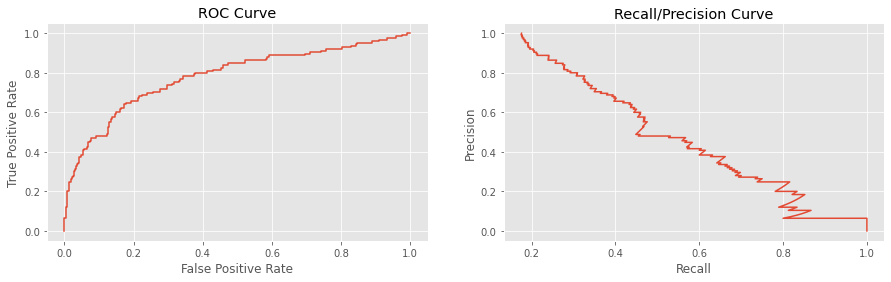

In [19]:
plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model)

## Sonuç

- Ham veri üzerinden normalize ve standartize yeni veriler oluşturuldu. Alternatif modeller üzerinde lojistik regresyon uygulandı. Normal veri için conf. matrix incelendiğinde iyi müşteri tahmini yüksek sonuçlandı, ama kötü müşteri tahmininde iyi performans sergilemedi. Kötü müşteriyi yanlış tahminlemeden dolayı, bu sonuçlar olumsuz maliyetler doğuralabilir. Maliyet analizine göre Recall artışına ihtiyacımız vardır.
- Farklı scale'ler üzerinden model incelendidğinde, en iyi recall değeri normal veride yakalandı. Diğer performans değerleri için yaklaşık sayılar gözlemlendi.
- p değerlerine bakıldığında, clno değişkeni hedef üzerinde anlamsız bir etkisi vardı. Modelden çıkarıldığında, performansta düşüş yaşandı.
- Model yöntemi üzerinde parametrik değişiklikler yapıldı, ama performans üzerinde etkili olmadı.
- Hedef değişkenin 80-20 dağılımı olduğundan dolayı, kısmi bir dengesizilik söz konusu olduğu düşünüldü. Dolayısıyla veri setinin performansı için roc eğrisi yerine, recall/precision eğrisi incelenmiştir. Genel olarak pr-auc değeri iyi performans göstermemiştir.